In [1]:
cd ~/PycharmProjects/CleanSpace/momia2/

/Users/jzrolling/PycharmProjects/CleanSpace/momia2


In [2]:
import momia2 as mo
import glob, numpy as np
from matplotlib import pyplot as plt
from skimage.measure import approximate_polygon, regionprops
from skimage.filters import gaussian
from skimage.draw import polygon2mask

In [3]:
m = mo.ImageLoader('/Users/jzrolling/Desktop/Daisy_BODIPY/cDXJ3-3_001_composite.tif')

for i in range(m.n_fields):
    data = m.get_slice_all_channels(position=i)
    p = mo.Patch(data,image_id=m.header)
    p.pixel_microns=0.11
    p.correct_xy_drift()
    #p.crop_edge()
    p.preprocess_images(mo.utils.dual_bandpass,channels='ref',
                        pixel_microns=p.pixel_microns,
                        min_structure_scale=0.1,
                        max_structure_scale=50)
    p.preprocess_images(mo.utils.normalize_image,channels='ref',mask=1)
    p.preprocess_images(mo.utils.rolling_ball_bg_subtraction,channels='fl')
    p.generate_mask(method=5)
    p.label_mask()
    p.locate_particles(cache_data = True)
    p.find_outline(approximate=True,
                   tolerance=0.6,
                   level=0.3,
                   dilation=True,
                   sigma=1)
    p.filter_particles({'area': (50, 1000),
                  'aspect_ratio': (0.05, 0.9),
                  'solidity': (0.7, 1),
                  'eccentricity': (0.1, 1),
                  'max_positive_curvature':(50,180),
                  'min_negative_curvature': (-10, 80),
                   "min_intensity":(0,0.3)})
    p.extract_midlines(filtered_only=True)
    p.get_intensity_stats()
    p.get_morphology_stats()
    p.save_particles('/Users/jzrolling/Desktop/Daisy_BODIPY/cDXJ3-3_001_composite_cells.pk',as_dictionary=False)
    break

In [4]:
df = mo.momia_IO.pickle_load('/Users/jzrolling/Desktop/Daisy_BODIPY/cDXJ3-3_001_composite_cells.pk')

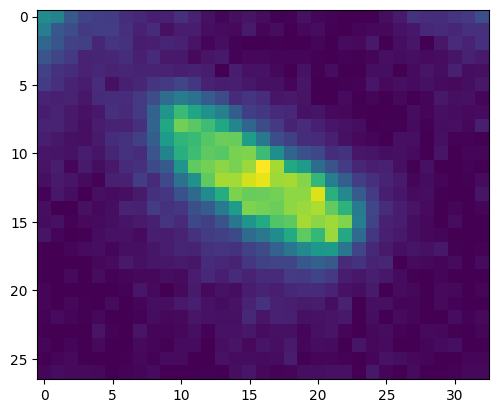

In [9]:
plt.imshow(df['$C1'].values[0])


In [8]:
df.columns

Index(['$bbox-0', '$bbox-1', '$bbox-2', '$bbox-3', '$coords', '$centroid-0',
       '$centroid-1', 'area', 'convex_area', 'filled_area', 'eccentricity',
       'solidity', 'major_axis_length', 'minor_axis_length', 'perimeter',
       'equivalent_diameter', 'extent', 'orientation', 'inertia_tensor-0-0',
       'inertia_tensor-0-1', 'inertia_tensor-1-0', 'inertia_tensor-1-1',
       'moments_hu-0', 'moments_hu-1', 'moments_hu-2', 'moments_hu-3',
       'moments_hu-4', 'moments_hu-5', 'moments_hu-6', 'weighted_moments_hu-0',
       'weighted_moments_hu-1', 'weighted_moments_hu-2',
       'weighted_moments_hu-3', 'weighted_moments_hu-4',
       'weighted_moments_hu-5', 'weighted_moments_hu-6', 'mean_intensity',
       'max_intensity', 'min_intensity', 'compactness', 'rough_length',
       'aspect_ratio', '$image_id', '$opt-x1', '$opt-y1', '$opt-x2', '$opt-y2',
       '$touching_edge', '$include', '$midlines', '$outline',
       '$refined_outline', '$widths_list', '$C1', '$C2', '$mask',
   

Rendering cell plot(s)...


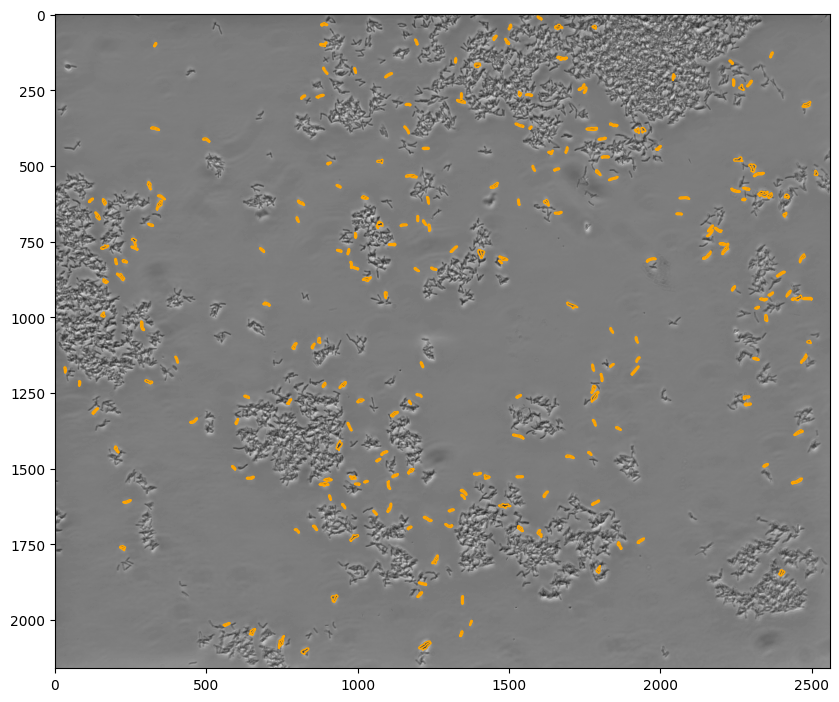

In [4]:
#"""

p.plot(figsize=(10,10))

In [11]:
p.regionprops[p.regionprops['$include']==1]

,$bbox-0,$bbox-1,$bbox-2,$bbox-3,$coords,$centroid-0,$centroid-1,area,convex_area,filled_area,...,C2_CV,C2_skewness,C2_kurtosis,length [µm],width_median [µm],width_std [µm],width_max [µm],width_Q1 [µm],width_Q3 [µm],sinuosity
$label,,,,,,,,,,,,,,,,,,,,,
10,5,1593,19,1610,"[[5, 1594], [5, 1595], [5, 1596], [5, 1597], [...",11.257576,1600.734848,132.0,140.0,132.0,...,0.219748,-0.041999,-1.291549,1.888182,0.638538,0.066424,0.734564,0.628197,0.703354,1.000000
16,27,878,38,902,"[[27, 889], [28, 887], [28, 888], [28, 889], [...",32.600000,889.212500,160.0,196.0,160.0,...,0.202750,0.223759,-1.053048,2.523869,0.736452,0.112180,0.872661,0.658300,0.792535,1.000000
19,32,1497,51,1509,"[[32, 1504], [32, 1505], [33, 1503], [33, 1504...",41.353383,1503.285714,133.0,151.0,133.0,...,0.192683,-0.173821,-0.623691,2.009721,0.704399,0.107054,0.865832,0.625456,0.777698,1.000000
20,32,1651,51,1679,"[[32, 1661], [32, 1662], [32, 1663], [32, 1664...",41.208333,1663.320513,312.0,379.0,312.0,...,0.266057,0.028213,-0.784047,2.605507,1.135194,0.392463,1.747759,0.839292,1.524068,1.000000
21,38,1775,46,1787,"[[38, 1777], [38, 1778], [38, 1779], [39, 1776...",41.579710,1780.768116,69.0,73.0,69.0,...,0.154168,-0.437523,-0.816703,1.398364,0.924412,0.199104,1.062836,0.737860,1.001917,1.013160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,2029,639,2052,662,"[[2029, 660], [2030, 655], [2030, 656], [2030,...",2040.508264,651.392562,242.0,288.0,242.0,...,0.221997,-0.055415,-0.565660,2.701351,1.064263,0.304915,1.446581,0.852426,1.206968,1.000000
556,2036,1337,2056,1348,"[[2036, 1343], [2036, 1344], [2036, 1345], [20...",2045.503937,1342.181102,127.0,140.0,127.0,...,0.140165,-0.065846,-1.059331,2.075771,0.690580,0.074823,0.763704,0.667024,0.724012,1.000000
560,2052,737,2096,758,"[[2052, 754], [2052, 755], [2052, 756], [2053,...",2073.052500,747.087500,400.0,534.0,400.0,...,0.211216,-0.172503,0.025106,4.928563,0.795736,0.399812,1.796970,0.545477,1.277620,1.017832


In [7]:
p.regionprops

,$bbox-0,$bbox-1,$bbox-2,$bbox-3,$coords,$centroid-0,$centroid-1,area,convex_area,filled_area,...,C2_CV,C2_skewness,C2_kurtosis,length [µm],width_median [µm],width_std [µm],width_max [µm],width_Q1 [µm],width_Q3 [µm],sinuosity
$label,,,,,,,,,,,,,,,,,,,,,
1,0,0,19,20,"[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5...",6.217195,6.855204,221.0,234.0,221.0,...,0.033531,-0.301093,-0.356221,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,261,10,281,"[[0, 261], [0, 262], [0, 263], [0, 264], [0, 2...",3.382114,271.682927,123.0,129.0,123.0,...,0.229622,0.037073,-1.317552,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1185,142,1341,"[[0, 1207], [0, 1208], [0, 1209], [0, 1210], [...",48.594626,1268.164666,5247.0,13472.0,5367.0,...,0.237684,-0.023506,-0.294807,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1370,15,1394,"[[0, 1382], [0, 1383], [0, 1384], [0, 1385], [...",6.280220,1380.763736,182.0,201.0,182.0,...,0.311951,0.051417,-1.300901,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,1214,382,2336,"[[0, 1547], [0, 1548], [0, 1549], [0, 1550], [...",160.923332,1814.192469,152710.0,333146.0,195898.0,...,0.222871,0.284617,0.156151,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,2082,672,2099,696,"[[2082, 677], [2082, 678], [2083, 676], [2083,...",2089.103139,683.748879,223.0,289.0,223.0,...,0.133730,0.344714,-0.238125,0.0,0.0,0.0,0.0,0.0,0.0,0.0
567,2086,2002,2126,2030,"[[2086, 2007], [2086, 2008], [2086, 2009], [20...",2107.002119,2013.959746,472.0,692.0,472.0,...,0.111523,0.203547,-0.056820,0.0,0.0,0.0,0.0,0.0,0.0,0.0
568,2093,814,2122,839,"[[2093, 832], [2093, 833], [2093, 834], [2093,...",2105.836228,827.531017,403.0,467.0,403.0,...,0.198032,-0.036912,-0.641814,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
c1 = p.get_particle_data(71)['C1']
midline = p.get_particle_data(71)['$midlines'][0]
outline = p.get_particle_data(71)['$outline']

In [17]:
np.concatenate([np.array([1,2]),np.array([3,4,5])])

array([1, 2, 3, 4, 5])

In [9]:
for x in p.regionprops['$midlines'].values:
    print(len(x))

0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
1
1
1
0
0
0
1
1
1
0
2
1
0
0
0
0
1
0
1
0
1
0
0
1
1
0
0
0
0
0
1
1
0
0
0
1
1
0
0
0
0
0
1
1
0
0
1
0
0
1
1
0
1
0
1
1
1
0
0
0
1
0
0
1
0
1
0
0
0
0
0
0
0
0
1
1
0
1
1
0
1
1
1
0
0
1
1
0
0
0
0
0
1
0
1
1
1
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
0
0
0
1
0
1
0
0
0
0
1
0
0
0
1
0
1
0
0
0
1
0
1
0
1
0
0
0
1
0
1
0
0
0
0
1
1
0
0
1
0
1
0
1
1
1
0
1
1
1
0
1
0
1
1
1
0
0
0
0
0
0
0
0
0
0
1
1
1
0
1
0
0
1
0
1
0
0
1
0
0
1
1
1
1
0
0
1
0
0
1
1
0
0
0
0
1
2
1
0
0
0
0
1
1
1
1
1
1
1
0
1
1
0
1
1
0
1
1
1
0
0
0
0
0
1
1
1
0
0
1
0
1
0
0
1
0
0
1
0
0
0
0
1
0
0
0
1
1
1
0
0
0
0
0
1
1
1
0
0
1
0
0
1
0
0
1
0
1
0
0
1
1
0
0
0
0
0
0
0
1
1
0
0
0
0
1
1
0
0
0
1
1
1
0
1
0
0
1
0
1
1
0
0
1
1
0
0
0
0
1
0
0
0
0
1
1
0
1
0
0
1
0
0
0
1
1
0
1
1
1
0
0
0
0
0
0
1
1
0
1
1
0
0
0
0
1
0
0
0
1
0
0
1
1
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
0
1
1
0
1
0
0
1
0
0
1
0
0
1
1
0
0
0
0
1
0
1
1
1
1
1
1
1
0
1
1
1
0
1
0
0
0
0
0
1
0
1
1
0
1
0
1
1
0
0
1
0
1
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
1
1
0
0
0
1
0
1
0
0
0
1
0
1
0


In [29]:
cell['$centroid-0']

193.33346233230134

In [27]:
cell['orientation']

0.21461718067177551

In [ ]:
if not skeleton_found:
    min_branch_length_pix = int(np.round(min_branch_length/pixel_microns))
    skeleton_coords, skeleton = mo.utils.skeleton_analysis(mask,
                                                           method='zhang',
                                                           min_branch_length=min_branch_length_pix)
    skeleton_coords = mo.utils.merge_branch_points(skeleton_coords,max_dist=5)
    return skeleton

True

In [166]:
from timeit import default_timer

fig=plt.figure(figsize=(10,10))
n=12
mask = part[n]['$mask']
#outline = part[n]['$outline']
outline = mo.utils.spline_approximation(part[n]['$outline'],
                                        n=len(part[n]['$outline']),
                                        closed=True,
                                        smooth_factor=3)
orientation = part[n]['orientation']
centroid = part[n]['centroid']
        interp_factor=2
        x0,y0 = centroid
        dx,dy = np.cos(orientation),np.sin(orientation)
        init_centerline = np.array([np.linspace(x0,x0+dx,30),
                                    np.linspace(y0,y0+dy,30)]).T
        extended_centerline = extend_skeleton(init_centerline, contour)
        smooth_skel, _converged = midline_approximation(extended_centerline[1:-1],
                                                        contour,max_iteration=1)
        midline = extend_skeleton(smooth_skel, contour,
                                  find_pole1=True,
                                  find_pole2=True,
                                  interpolation_factor=1)

#outline = part[n]['$outline']

    #plt.plot(simp[:,1],simp[:,0])
plt.imshow(skeleton)


IndentationError: unexpected indent (778849560.py, line 13)

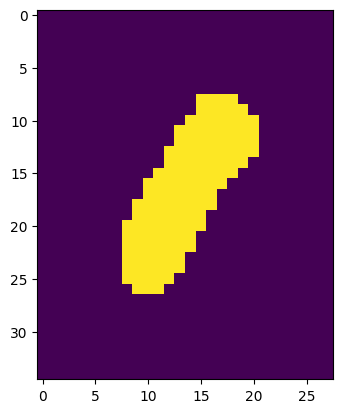

In [173]:
plt.imshow(mask)

## a,b=mo.utils.skeleton_analysis(mask,method='lee')

In [9]:
def merge_branch_points(skeleton_coords,max_dist=3):
    centroid_groups_id = []
    centroid_groups_x = []
    centroid_groups_y = []
    centroid_groups = []

    for p,x,y in skeleton_coords:
        if p[0]==0:
            centroid_groups_x.append(x[0])
            centroid_groups_y.append(y[0])
        if p[1]==0:
            centroid_groups_x.append(x[-1])
            centroid_groups_y.append(y[-1])
    centroid_groups_x=np.array(centroid_groups_x)
    centroid_groups_y=np.array(centroid_groups_y)
    new_coords = []
    for p,x,y in skeleton_coords:
        new_x = x.copy()
        new_y = y.copy()
        if p[0]==0:
            new_x[0]=centroid_groups_x[np.abs(centroid_groups_x-x[0])<max_dist].mean()
            new_y[0]=centroid_groups_y[np.abs(centroid_groups_y-y[0])<max_dist].mean()
        if p[1]==0:
            new_x[-1]=centroid_groups_x[np.abs(centroid_groups_x-x[-1])<max_dist].mean()
            new_y[-1]=centroid_groups_y[np.abs(centroid_groups_y-y[-1])<max_dist].mean()
        new_coords.append([p,new_x,new_y])
    return new_coords

def midline_approximation(skeleton, 
                          smoothed_contour,
                          move_pole1 = False,
                          move_pole2 = False, 
                          anchor_length = 3,
                          tolerance=0.1, max_iteration=10):
    """
    Approximation of a smooth midline with skeleton and a smoothed contour.

    :param skeleton: A numpy array of shape (n, 2) representing the skeleton of a 2D object.
    :param smoothed_contour: A numpy array of shape (m, 2) representing the smoothed contour of a 2D object.
    :param tolerance: A float representing the maximum distance between the midline and the skeleton at which convergence is achieved.
    :param max_iteration: An integer representing the maximum number of iterations to perform.
    :return: A tuple containing a numpy array of shape (p, 2) representing the midline approximation and a boolean indicating whether convergence was achieved.
    """
    midline = skeleton.copy()
    pole1_anchor = []
    pole2_anchor = []
    
    if not move_pole1:
        pole1_anchor = midline[:anchor_length]
        midline = midline[anchor_length:]
    if not move_pole2:
        pole2_anchor = midline[-anchor_length:]
        midline = midline[:-anchor_length]
    
    n = 0
    converged = False
    while n < max_iteration:
        updated_midline = mo.utils.midline.skeleton_contour_intersect_points(midline, smoothed_contour)
        dxy = updated_midline - midline
        updated_midline = mo.utils.linalg.spline_approximation(updated_midline, 
                                                   n=len(updated_midline),
                                                   smooth_factor=1, closed=False)
        if np.abs(dxy).mean() <= tolerance:
            converged = True
            break
        n += 1
    stiched_midline = []
    if not move_pole1:
        stiched_midline.append(pole1_anchor)
    stiched_midline.append(updated_midline)
    if not move_pole2:
        stiched_midline.append(pole2_anchor)
    midline = np.vstack(stiched_midline)
    return midline.astype(float), converged


def extend_skeleton(smoothed_skeleton,
                    smoothed_contour,
                    find_pole1=True,
                    find_pole2=True,
                    subdivide_pole_segment=5,
                    interpolation_factor=1):
    # initiate approximated tip points
    new_pole1, new_pole2, smoothed_skeleton = mo.utils.find_poles(smoothed_skeleton,
                                                                 smoothed_contour,
                                                                 find_pole1=find_pole1,
                                                                 find_pole2=find_pole2)

    extended_skeleton = []
    if find_pole1:
        segment1 = (np.array([np.linspace(new_pole1[0][0], smoothed_skeleton[0, 0], subdivide_pole_segment),
                              np.linspace(new_pole1[0][1], smoothed_skeleton[0, 1], subdivide_pole_segment)]).T)[:-1]
    else:
        segment1 = new_pole1
    if find_pole2:
        segment2 = (np.array([np.linspace(smoothed_skeleton[-1, 0], new_pole2[0][0], subdivide_pole_segment),
                              np.linspace(smoothed_skeleton[-1, 1], new_pole2[0][1], subdivide_pole_segment)]).T)[1:]
    else:
        segment2 = new_pole2

    extended_skeleton = np.concatenate([segment1,
                                        smoothed_skeleton,
                                        segment2])
    return mo.utils.spline_approximation(extended_skeleton,
                                        n=int(interpolation_factor * len(smoothed_skeleton)),
                                        smooth_factor=0, closed=False)

In [473]:
centroid_groups_x

[33, 32, 34]

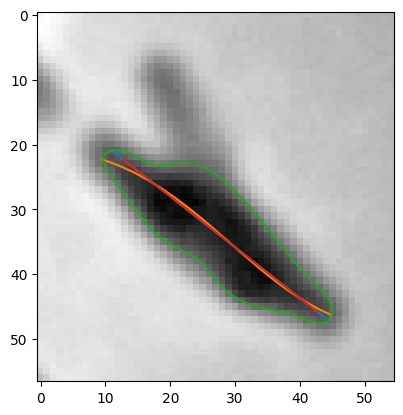

<Figure size 640x480 with 0 Axes>

In [11]:
regionprop_obj = regionprops(mask*1)[0]
orientation = regionprop_obj.orientation
max_length = regionprop_obj.major_axis_length
centroid = regionprop_obj.centroid
if max_length<15:
    interp_factor=0.5
elif max_length<30:
    interp_factor=1.5
elif max_length<80:
    interp_factor=2
elif max_length<90:
    interp_factor=2.5
else:
    interp_factor=3
x0,y0 = centroid
dx,dy = np.cos(orientation),np.sin(orientation)
init_centerline = np.array([np.linspace(x0,x0+dx,int(max_length/interp_factor)),
                            np.linspace(y0,y0+dy,int(max_length/interp_factor))]).T
extended_centerline = mo.utils.extend_skeleton(init_centerline, outline)
smooth_skel, _converged = midline_approximation(extended_centerline[1:-1],
                                                outline,max_iteration=30,
                                                move_pole1 = True,
                                                move_pole2 = True,
                                                tolerance=0.01,anchor_length=3)
smooth_skel = mo.utils.extend_skeleton(smooth_skel, outline)
plt.imshow(part[n]['Phase_Ian'],cmap='gist_gray')
plt.plot(extended_centerline[:,1],extended_centerline[:,0])
plt.plot(smooth_skel[:,1],smooth_skel[:,0])
plt.plot(outline[:,1],outline[:,0])
plt.plot(extended_centerline[1:-1,1],extended_centerline[1:-1,0])
fig2=plt.figure()

In [42]:
regionprop_obj = measure.regionprops(mask*1)[0]
        if orientation is None:
            orientation = regionprop_obj.orientation
        if centroid is None:
            centroid = regionprop_obj.centroid
        interp_factor=2
        x0,y0 = centroid
        dx,dy = np.cos(orientation),np.sin(orientation)
        init_centerline = np.array([np.linspace(x0,x0+dx,30),
                                    np.linspace(y0,y0+dy,30)]).T
        extended_centerline = extend_skeleton(init_centerline, contour)
        smooth_skel, _converged = midline_approximation(extended_centerline[1:-1],
                                                        contour,max_iteration=1,)
        midline = extend_skeleton(smooth_skel, contour,
                                  find_pole1=True,
                                  find_pole2=True,
                                  interpolation_factor=1)

IndentationError: unexpected indent (203034708.py, line 2)

In [12]:
def mask2midline(mask,
                 contour,
                 ellipse_fast=False,
                 orientation=None,
                 centroid=None,
                 pruning=True, 
                 min_branch_length=5,
                 max_iteration=2):

    warnings.filterwarnings("ignore")
    """

    :param mask: binary mask
    :param contour: contour polygon
    :param ellipse_fast: fit to ellipse then use the line connecting the two distal poles to initialize midline
    :param orientation: precomputed orientation of the particle
    :param centroid: precomputed centroid of the particle
    :param pruning: prune branches if set to True
    :param min_branch_length: maximum length of branches to be pruned
    :param max_iteration: maximum number of iterations
    :return: midline as numpy.array with a shape of N x 2
    """
    
    if not ellipse_fast:
        skeleton_coords, skeleton = skeleton_analysis(mask,pruning=pruning,
                                                      min_branch_length=min_branch_length)
        pole1, pole2 = skeleton_coords[0][0]
        xcoords = skeleton_coords[0][1]
        ycoords = skeleton_coords[0][2]
        skel_coords = np.array([xcoords, ycoords]).T
        if len(skel_coords)<20:
            interp_factor=1
        else:
            interp_factor=2
        smooth_skel = spline_approximation(skel_coords,
                                           n=int(len(skel_coords)/interp_factor),
                                           smooth_factor=3, closed=False)
        smooth_skel, _converged = midline_approximation(smooth_skel,
                                                        contour,max_iteration=max_iteration)
        midline = extend_skeleton(smooth_skel, contour,
                                           find_pole1=pole1,
                                           find_pole2=pole2,
                                           interpolation_factor=interp_factor)
    else:
        regionprop_obj = measure.regionprops(mask*1)[0]
        if orientation is None:
            orientation = regionprop_obj.orientation
        if centroid is None:
            centroid = regionprop_obj.centroid
        interp_factor=2
        x0,y0 = centroid
        dx,dy = np.cos(orientation),np.sin(orientation)
        init_centerline = np.array([np.linspace(x0,x0+dx,30),
                                    np.linspace(y0,y0+dy,30)]).T
        extended_centerline = extend_skeleton(init_centerline, contour)
        smooth_skel, _converged = midline_approximation(extended_centerline[1:-1],
                                                        contour,max_iteration=1)
        midline = extend_skeleton(smooth_skel, contour,
                                  find_pole1=True,
                                  find_pole2=True,
                                  interpolation_factor=1)

    return midline

In [53]:
p.get_particle_data(p.regionprops[p.regionprops['$include']>0].index[34])['Phase_Ian'].max()

0.5995380682519865

In [12]:
        if _converged:
            smooth_skel=simplify_polygon(smooth_skel,tolerance=0.9,
                                          interp_distance=interp_distance)
        else:
            smooth_skel=simplify_polygon(extended,tolerance=0.9,
                                          interp_distance=interp_distance)

Index(['$bbox-0', '$bbox-1', '$bbox-2', '$bbox-3', '$coords', '$centroid-0',
       '$centroid-1', 'area', 'convex_area', 'filled_area', 'eccentricity',
       'solidity', 'major_axis_length', 'minor_axis_length', 'perimeter',
       'equivalent_diameter', 'extent', 'orientation', 'inertia_tensor-0-0',
       'inertia_tensor-0-1', 'inertia_tensor-1-0', 'inertia_tensor-1-1',
       'moments_hu-0', 'moments_hu-1', 'moments_hu-2', 'moments_hu-3',
       'moments_hu-4', 'moments_hu-5', 'moments_hu-6', 'weighted_moments_hu-0',
       'weighted_moments_hu-1', 'weighted_moments_hu-2',
       'weighted_moments_hu-3', 'weighted_moments_hu-4',
       'weighted_moments_hu-5', 'weighted_moments_hu-6', 'mean_intensity',
       'max_intensity', 'min_intensity', 'compactness', 'rough_length',
       'aspect_ratio', '$image_id', '$opt-x1', '$opt-y1', '$opt-x2', '$opt-y2',
       '$touching_edge', '$include', '$midlines', '$outline',
       '$refined_outline', 'min_negative_curvature', 'max_positive_cu

In [11]:
from skimage import measure,morphology,transform,draw